In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:5

$$y=1.2x - 3.4x^2 +5.6x^3 + 5 +\xi $$

In [2]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = tf.random.normal(shape=(n_train + n_test, 1))
poly_features = tf.concat([features, tf.pow(features, 2), tf.pow(features, 3)],1)
print(poly_features.shape)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]+ true_w[2] * poly_features[:, 2] + true_b)
print(tf.shape(labels))
labels += tf.random.normal(labels.shape,0,0.1)


(200, 3)
tf.Tensor([200], shape=(1,), dtype=int32)


In [3]:
features[:2], poly_features[:2], labels[:2]


(<tf.Tensor: id=46, shape=(2, 1), dtype=float32, numpy=
 array([[0.70681643],
        [0.67222184]], dtype=float32)>,
 <tf.Tensor: id=50, shape=(2, 3), dtype=float32, numpy=
 array([[0.70681643, 0.49958947, 0.35311803],
        [0.67222184, 0.45188218, 0.30376506]], dtype=float32)>,
 <tf.Tensor: id=54, shape=(2,), dtype=float32, numpy=array([6.1366715, 5.9911613], dtype=float32)>)

In [4]:
# 本函数已保存在d2lzh_tensorflow2包中方便以后使用
from IPython import display
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    """Set matplotlib figure size."""
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()


In [5]:

num_epochs, loss = 100, tf.losses.MeanSquaredError()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1))
    batch_size = min(10, train_labels.shape[0])
    train_iter = tf.data.Dataset.from_tensor_slices(
        (train_features, train_labels)).batch(batch_size)
    test_iter = tf.data.Dataset.from_tensor_slices(
        (test_features, test_labels)).batch(batch_size)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with tf.GradientTape() as tape:
                l = loss(y, net(X))

            grads = tape.gradient(l, net.trainable_variables)
            optimizer.apply_gradients(zip(grads, net.trainable_variables))

        train_ls.append(loss(train_labels, net(train_features)).numpy().mean())
        test_ls.append(loss(test_labels, net(test_features)).numpy().mean())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.get_weights()[0],
          '\nbias:', net.get_weights()[1])


final epoch: train loss 1161.9194 test loss 645.4323


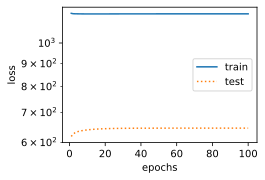

weight: [[ 1.5085655 ]
 [-0.6062038 ]
 [-0.23194733]] 
bias: [-1.8322644]


In [6]:
# 正常情况
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
             labels[:n_train], labels[n_train:])


final epoch: train loss 1162.6263 test loss 643.7945


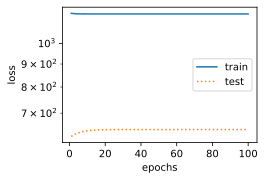

weight: [[1.5663434]] 
bias: [-2.5178268]


In [7]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])


final epoch: train loss 0.041923735 test loss 741.6986


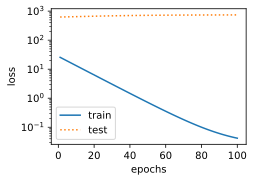

weight: [[1.8957824]
 [2.5627115]
 [1.7363335]] 
bias: [2.8333974]


In [8]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])
